K-means Algorithm - Wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(2)
wine_pca = pca.fit_transform(wine_std)

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=3, random_state=2023, n_init='auto')
kmeans.fit(wine_std)            # 비지도 학습이므로 y값을 제공하지 않음

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=2023)

In [6]:
df = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
df['target'] = wine.target
df['cluster'] = kmeans.labels_

In [7]:
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      2         59
1      0         64
       1          3
       2          4
2      1         48

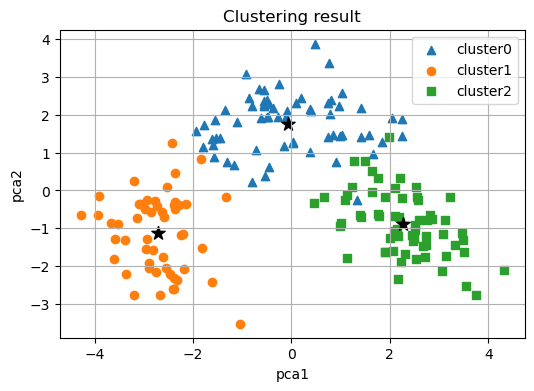

In [12]:
markers = ['^', 'o', 's']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)
plt.grid(), plt.legend()
plt.title("Clustering result")
plt.xlabel('pca1'), plt.ylabel('pca2');

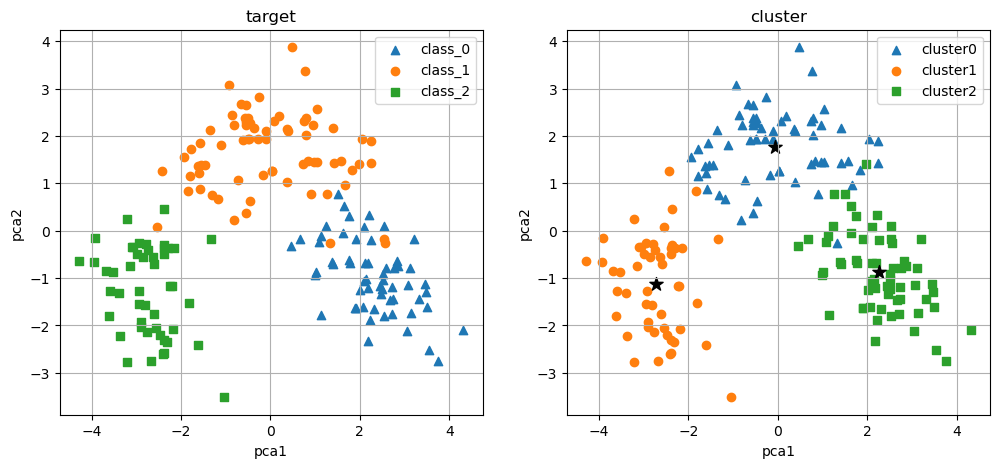

In [13]:
plt.figure(figsize=(12,5))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)
    markers = ['^', 'o', 's']
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label=column+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)
    plt.grid(), plt.legend()
    plt.title(f"{column}")
    plt.xlabel('pca1'), plt.ylabel('pca2');